<a href="https://colab.research.google.com/github/annchirackal/Tensorflow-Developer-Certification/blob/TF_certification_practice_CNN/10_CNN_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Nueral Networks and  Computer Vision with Tensorflow

Computer vision is the practice of  writing alogorithams which can discover patterns in visual data. For example, camera of self driving car recognizing car in front


### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import os
import pathlib
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator




### 2. Get Data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.

In [2]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-20 20:17:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   152MB/s    in 0.7s    

2023-10-20 20:17:01 (152 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
#Unizp the dowloaded file
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


### 3. Understand the data

The best way to unserstand the data is to visualize the data points and the metadata . For a compurt vision project we can visualise multiple images from data

#### 3.1 Understand the folder structure

In [4]:
# we have uzipped the data set. Lets check the contents of the folder
!ls pizza_steak/

test  train


In [5]:
 !ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/test

pizza  steak


In [7]:
## Lets use the walk funtion in os to understand more about the directory
for dirpath,dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are '{len(dirnames)}' directories and '{len(filenames)}' images in '{dirpath}'. ")

There are '2' directories and '0' images in 'pizza_steak'. 
There are '2' directories and '0' images in 'pizza_steak/train'. 
There are '0' directories and '750' images in 'pizza_steak/train/pizza'. 
There are '0' directories and '750' images in 'pizza_steak/train/steak'. 
There are '2' directories and '0' images in 'pizza_steak/test'. 
There are '0' directories and '250' images in 'pizza_steak/test/pizza'. 
There are '0' directories and '250' images in 'pizza_steak/test/steak'. 


In [8]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct 20 20:17 .
drwxr-xr-x 1 root root 4096 Oct 20 20:17 ..
drwxr-xr-x 4 root root 4096 Oct 20 20:17 test
drwxr-xr-x 4 root root 4096 Oct 20 20:17 train


#### 3.2 Visualize random image

In [9]:
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))# create a list of calss names from sub directories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
# Lets visualise our images

def view_random_image(target_dir,target_class):
  #setup the target directory
  target_folder = target_dir+target_class


  #Get random image path
  random_image=random.sample(os.listdir(target_folder),1)

  # Read in mage and plot it using matplotlib

  img= mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") ## show the imag shape
  return img






Image shape : (512, 512, 3)


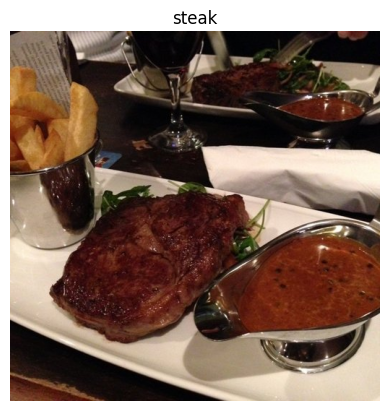

In [11]:
# View random image of steak  from training dataset
img=view_random_image("pizza_steak/train/","steak")

Image shape : (512, 512, 3)


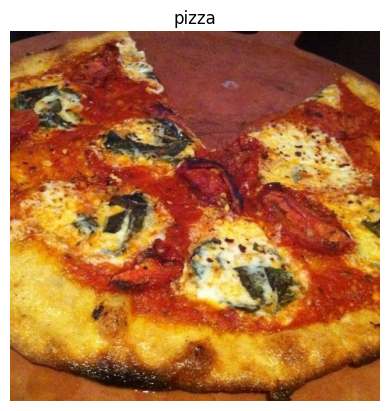

In [12]:
# View random image of steak  from training dataset
img=view_random_image("pizza_steak/train/","pizza")


In [13]:
img

array([[[ 13,  23,  24],
        [ 13,  23,  24],
        [ 14,  22,  24],
        ...,
        [ 20,  13,   7],
        [ 20,  11,   6],
        [ 21,  12,   7]],

       [[ 16,  24,  26],
        [ 15,  23,  25],
        [ 14,  22,  24],
        ...,
        [ 23,  16,  10],
        [ 22,  13,   8],
        [ 22,  13,   8]],

       [[ 18,  24,  24],
        [ 17,  23,  23],
        [ 15,  21,  21],
        ...,
        [ 27,  20,  14],
        [ 26,  17,  12],
        [ 26,  17,  12]],

       ...,

       [[147,  76,  20],
        [148,  79,  20],
        [157,  88,  31],
        ...,
        [184,  98,  41],
        [188,  99,  41],
        [188,  99,  41]],

       [[141,  72,  13],
        [146,  78,  17],
        [149,  80,  21],
        ...,
        [181,  92,  36],
        [179,  88,  31],
        [178,  87,  30]],

       [[140,  72,  11],
        [156,  88,  27],
        [155,  89,  28],
        ...,
        [184,  95,  39],
        [183,  92,  35],
        [184,  93,  36]]

### 3.4 Conclusions:
- Images have different shapes
- We have same number of samples from both pizza and steak

### 4 Data Preprocessing

- Load data and  Normalise/Scale data.
 -  Get all pixel values between 0 and 1

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255)# Genearted barches of data wit realtime data Augmentation
valid_datagen=ImageDataGenerator(rescale=1./225)
#set up paths
train_dir="pizza_steak/train"
test_dir ="pizza_steak/test"
## Import data from directoryand turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### Bulid a CNN Model
-  same as tiny VGG in on CNN explainer websiteMM

In [15]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
## Frist CNN model
cnn_model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile the model

cnn_model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
history_1=cnn_model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 132ms/step - loss: 0.5481 - accuracy: 0.7220 - val_loss: 0.4041 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4345 - accuracy: 0.7947 - val_loss: 0.3935 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4083 - accuracy: 0.8140 - val_loss: 0.3541 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.3795 - accuracy: 0.8447 - val_loss: 0.3558 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3351 - accuracy: 0.8607 - val_loss: 0.3374 - val_accuracy: 0.8640


In [17]:
#Epoch 1/5
#47/47 [==============================] - 101s 2s/step - loss: 0.5456 - accuracy: 0.7140 - val_loss: 0.4230 - val_accuracy: 0.8080
#it took 101s to run the forst epoch with cpu. So lets chage it to TPU : You can do by selecting runtime-->change run time-->TPU

In [18]:
#Model Summary
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### CNN Architecure Explanation Detailed Notes :
https://poloclub.github.io/cnn-explainer/